In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os


df= pd.read_csv('DOGE-USD.csv', encoding='utf-8')
df['Date'] = pd.to_datetime(df['Date'])




df.head

<bound method NDFrame.head of            Date      Open      High       Low     Close  Adj Close  \
0    2017-11-09  0.001207  0.001415  0.001181  0.001415   0.001415   
1    2017-11-10  0.001421  0.001431  0.001125  0.001163   0.001163   
2    2017-11-11  0.001146  0.001257  0.001141  0.001201   0.001201   
3    2017-11-12  0.001189  0.001210  0.001002  0.001038   0.001038   
4    2017-11-13  0.001046  0.001212  0.001019  0.001211   0.001211   
...         ...       ...       ...       ...       ...        ...   
1756 2022-08-31  0.061534  0.063333  0.061058  0.061330   0.061330   
1757 2022-09-01  0.061336  0.062479  0.060194  0.062372   0.062372   
1758 2022-09-02  0.062372  0.062712  0.060947  0.061635   0.061635   
1759 2022-09-03       NaN       NaN       NaN       NaN        NaN   
1760 2022-09-04  0.062682  0.062744  0.062667  0.062696   0.062696   

           Volume  
0       6259550.0  
1       4246520.0  
2       2231080.0  
3       3288960.0  
4       2481270.0  
...      

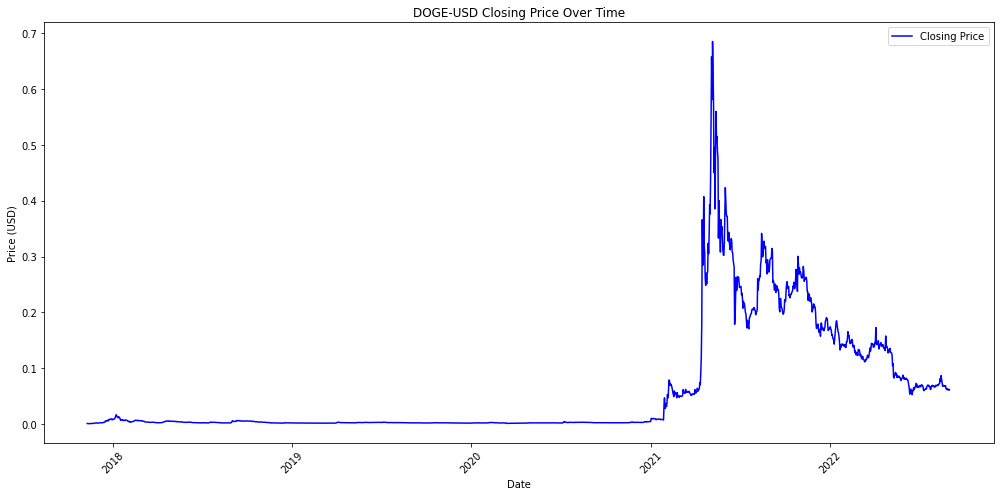

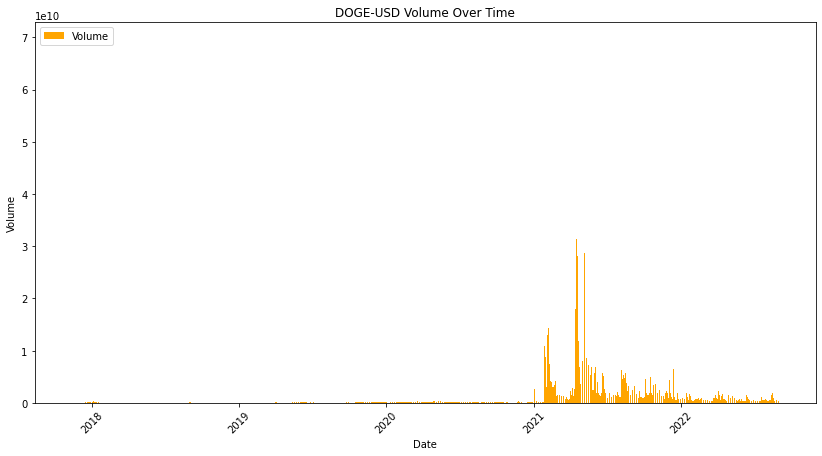

In [2]:
# create a new column for the year
df['Year'] = df['Date'].dt.year
# create a new column for the month
df['Month'] = df['Date'].dt.month
# create a new column for the day
df['Day'] = df['Date'].dt.day


# create a chart of the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('DOGE-USD Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('DOGE-USD_Closing_Price_Over_Time.png')

# create a chart of the volume over time
plt.figure(figsize=(14, 7))
plt.bar(df['Date'], df['Volume'], label='Volume', color='orange')
plt.title('DOGE-USD Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()

Epoch 1/50
36/36 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 2/50
36/36 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 3/50
36/36 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/50
36/36 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/50
36/36 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/50
36/36 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/50
36/36 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/50
36/36 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/50
36/36 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/50
36/36 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 11/50
36/36 [==============================] - 0s 2ms/step - loss: nan - 

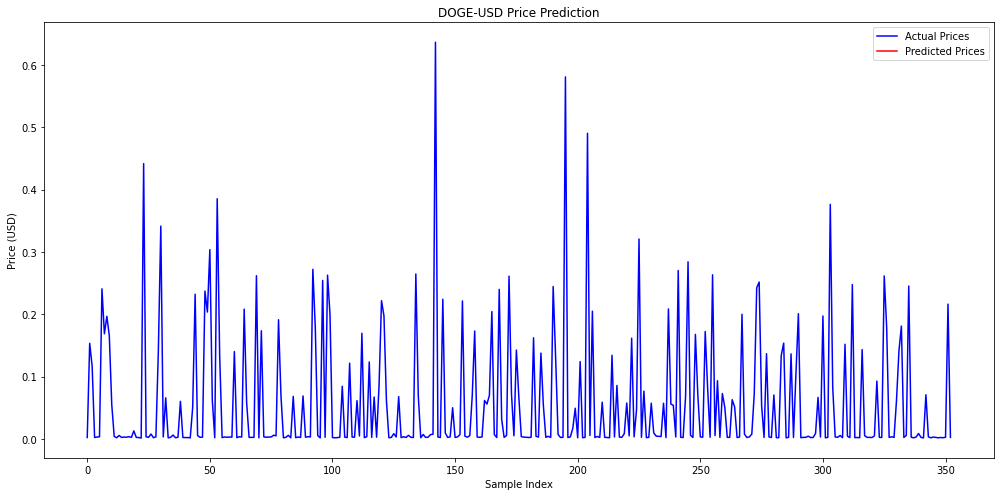

In [3]:
# create a neural network model to predict the closing price
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Prepare the data for training
features = df[['Open', 'High', 'Low', 'Volume']]
target = df['Close']
# Scale the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
# Create a simple neural network model
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')
# Make predictions
predictions = model.predict(X_test)
# Plot the predictions against the actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('DOGE-USD Price Prediction')
plt.xlabel('Sample Index')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.savefig('DOGE-USD_Price_Prediction.png')


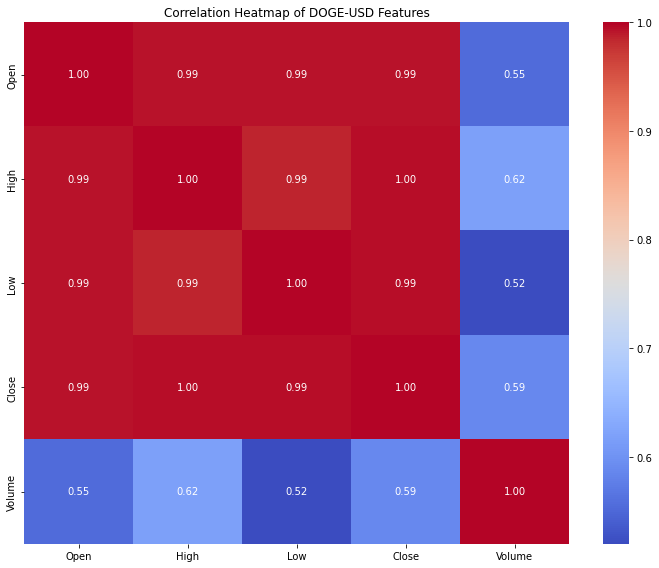

In [4]:
# create a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of DOGE-USD Features')
plt.tight_layout()
plt.savefig('DOGE-USD_Correlation_Heatmap.png')
# Save the processed DataFrame to a new CSV file



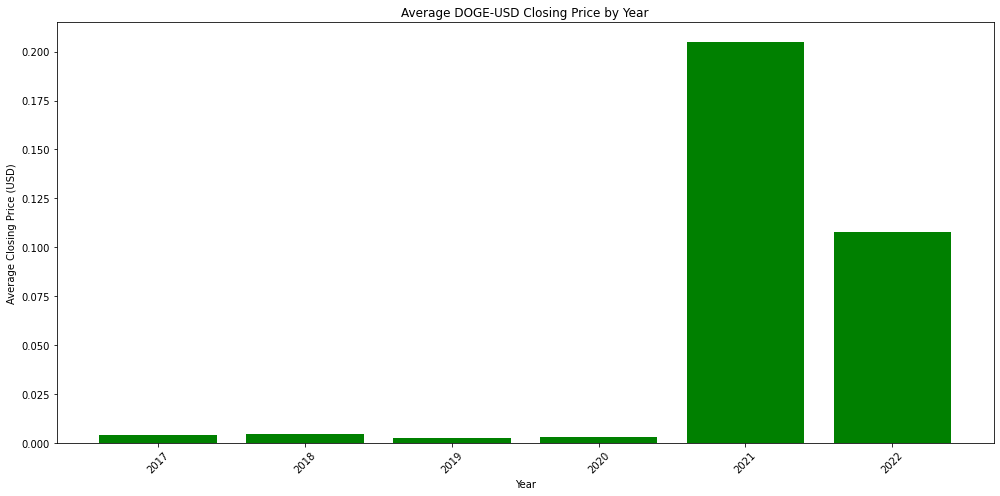

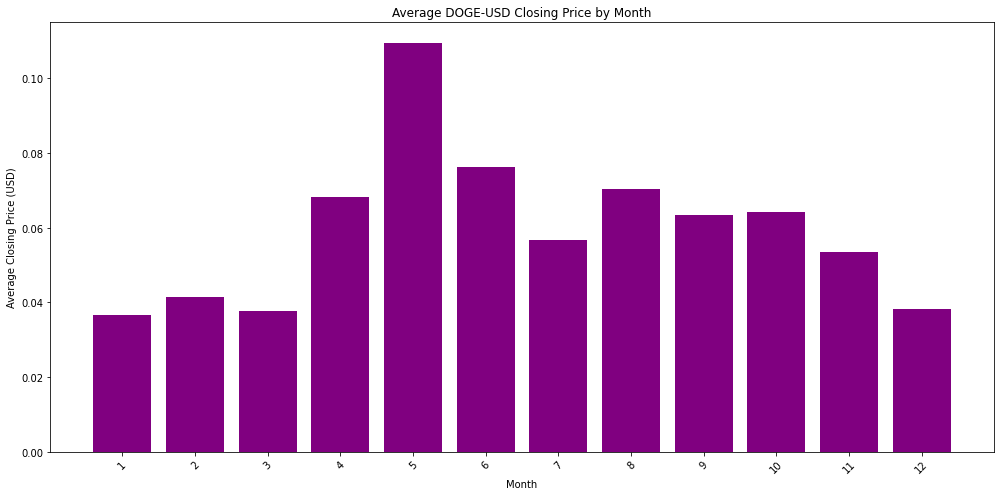

In [5]:
# create a compare analysis of the closing price over the years
years = df.groupby('Year')['Close'].mean().reset_index()
plt.figure(figsize=(14, 7))
plt.bar(years['Year'], years['Close'], color='green')
plt.title('Average DOGE-USD Closing Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Closing Price (USD)')
plt.xticks(years['Year'], rotation=45)
plt.tight_layout()
plt.savefig('DOGE-USD_Average_Closing_Price_by_Year.png')
# create a compare analysis of the closing price over the months
months = df.groupby('Month')['Close'].mean().reset_index()
plt.figure(figsize=(14, 7))
plt.bar(months['Month'], months['Close'], color='purple')
plt.title('Average DOGE-USD Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.xticks(months['Month'], rotation=45)
plt.tight_layout()
plt.savefig('DOGE-USD_Average_Closing_Price_by_Month.png')
